# **Project Name - Fraud Detection Model for Financial Transactions**

# **Project Summary -**

The aim of this project is to develop a machine learning model to predict fraudulent transactions for a financial company. The dataset provided contains transaction details including the type, amount, origin and destination accounts, and balance information before and after the transaction. Our goal is to use this data to build a robust fraud detection system that can identify fraudulent transactions accurately. The project involves several key steps including data cleaning, feature engineering, model development, and performance evaluation. Additionally, we will provide actionable insights and recommendations for preventing fraud and monitoring the effectiveness of implemented measures.

# **Problem Statements -**

Financial fraud is a significant issue for financial institutions, leading to substantial monetary losses and erosion of customer trust. Detecting fraudulent transactions promptly and accurately is critical to mitigate these risks. The primary objective of this project is to:
1. Develop a Fraud Detection Model:
- Build a machine learning model that can predict fraudulent transactions using historical transaction data.
- Evaluate the model's performance using appropriate metrics to ensure its effectiveness and reliability.

2. Analyze and Identify Key Predictors of Fraud:
- Determine the most important factors that contribute to fraudulent activities.
- Understand why these factors are significant and how they relate to fraudulent behavior.

3. Provide Actionable Recommendations:
- Based on the model's insights, recommend measures to prevent fraud.
- Suggest infrastructure updates and monitoring strategies to continuously detect and prevent fraudulent activities.

4. Monitor and Evaluate the Effectiveness of Implemented Measures:
- Establish a monitoring system to track the effectiveness of fraud prevention measures.
- Use feedback loops and periodic model re-evaluation to adapt to evolving fraud patterns.

### **Importing the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     #for visualization
%matplotlib inline
import seaborn as sns               #for visualization
import warnings
warnings.filterwarnings('ignore')

### **Load  Dataset**

In [2]:
Financial_transaction_data=pd.read_csv('Fraud.csv')

In [3]:
Financial_transaction_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


*About the Dataset

This financial tranaction dataset contains nearly 6362620  observations from transaction , with 11 columns of data. 

In [4]:
Financial_transaction_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


##**UNDERSTAND THE GIVEN VARIABLES**

**step -** maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type -** CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount -** amount of the transaction in local currency.

**nameOrig -** customer who started the transaction

**oldbalanceOrg -** initial balance before the transaction

**newbalanceOrig -** new balance after the transaction

**nameDest -** customer who is the recipient of the transaction

**oldbalanceDest -** initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

**newbalanceDest -** new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

**isFraud -** This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud -** The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [5]:
Financial_transaction_data.shape

(6362620, 11)

# Data Cleaning

In [6]:
#basic information about the dataset
Financial_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
Financial_transaction_data.duplicated().sum() # No duplicated record in the dataset

0

In [8]:
Financial_transaction_data.isnull().sum() # No null Values present in the dataset


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
Financial_transaction_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


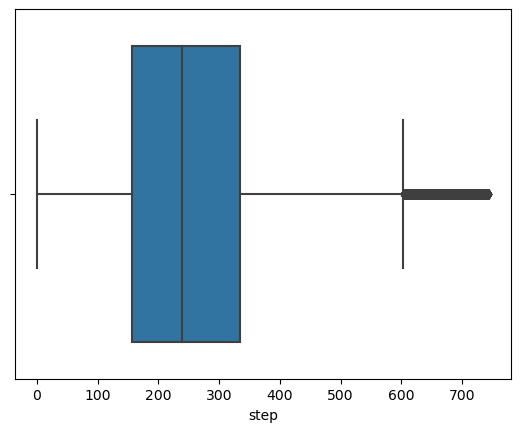

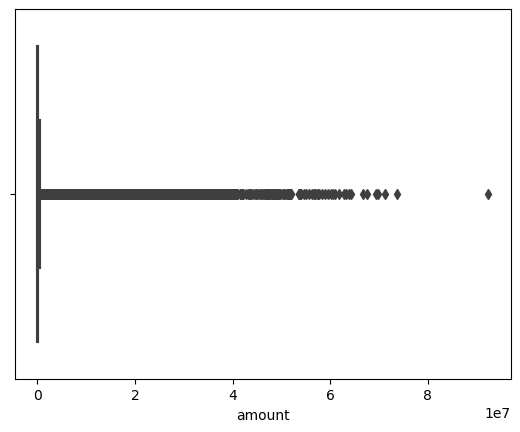

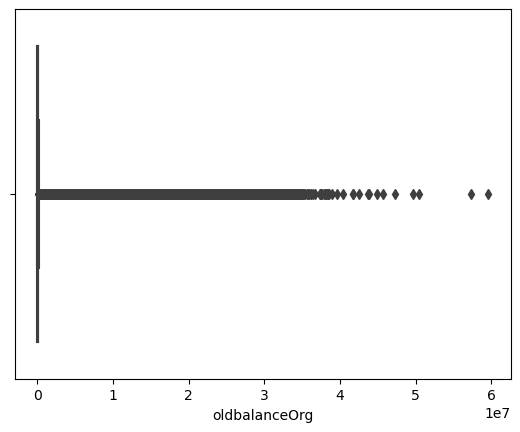

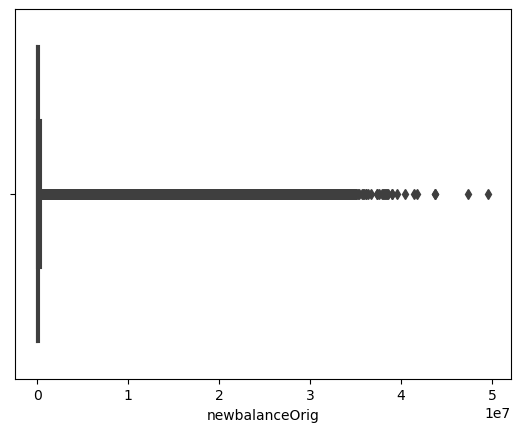

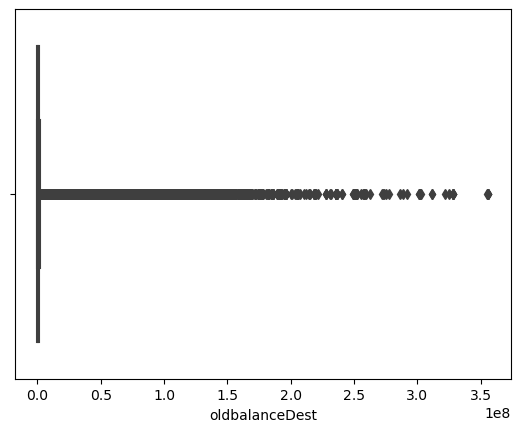

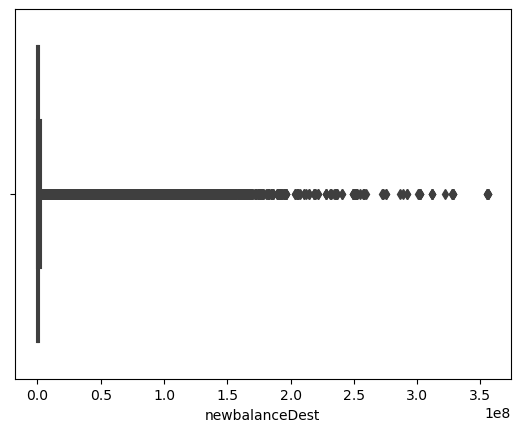

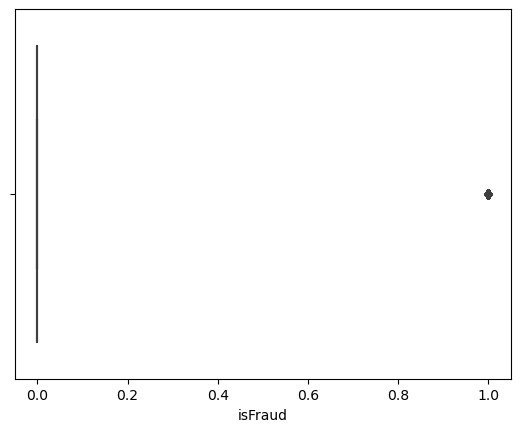

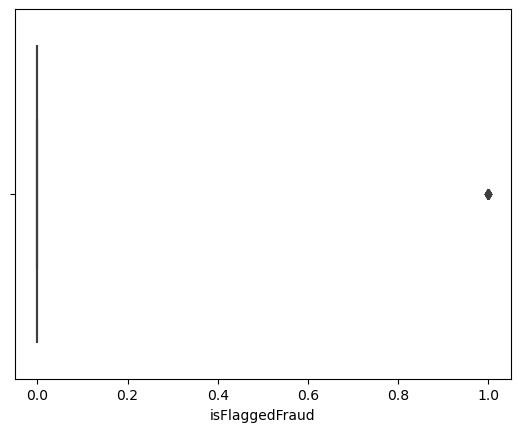

In [10]:
for i in Financial_transaction_data.describe():
    sns.boxplot(data=Financial_transaction_data,x=i)
    plt.show()

In [11]:
def iqr_technique(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    return upper_bound, lower_bound

# Calculate upper and lower bounds for the 'amount' column
upper_bound, lower_bound = iqr_technique(Financial_transaction_data['amount'])

# Filter the data based on the calculated bounds
new_data = Financial_transaction_data[(Financial_transaction_data['amount'] > lower_bound) & (Financial_transaction_data['amount'] < upper_bound)]


In [12]:
new_data.shape

(6024542, 11)

In [13]:
Financial_transaction_data.shape

(6362620, 11)

In [14]:
total_percentage_data = (new_data.shape[0] / Financial_transaction_data.shape[0]) * 100

# Calculate the percentage of data removed
percentage_removed_data = 100 - total_percentage_data

print(f"Total percentage of data retained: {total_percentage_data}%")
print(f"Percentage of data removed: {percentage_removed_data}%")

Total percentage of data retained: 94.68649707196091%
Percentage of data removed: 5.313502928039085%


According to one column is more than 5%,  might decide not to remove outliers because it would result in losing too much data

In [15]:
#outlairs Treatment
# IQR
def outliers_treatment(col):
 Q1=Financial_transaction_data[col].quantile(0.25)
 Q3=Financial_transaction_data[col].quantile(0.75)
 IQR= Q3 - Q1
 UB=Q3+1.5*IQR
 LB=Q1-1.5*IQR
 Upper_Outlier=Financial_transaction_data[col]>UB
 Lower_Outlier=Financial_transaction_data[col]<LB
 Financial_transaction_data.loc[Upper_Outlier,col]=Financial_transaction_data[col].median()
 Financial_transaction_data.loc[Lower_Outlier,col]=Financial_transaction_data[col].median()


In [16]:
for i in Financial_transaction_data.select_dtypes(['int','float']):
 outliers_treatment(i)

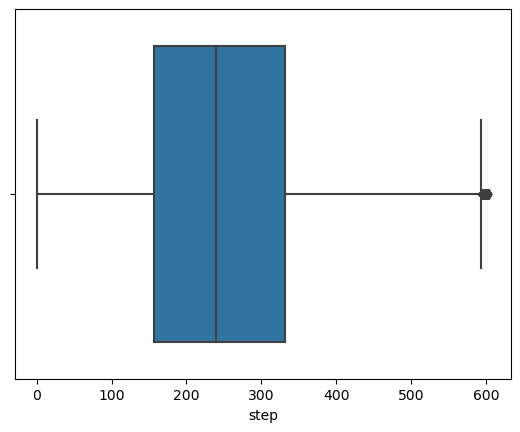

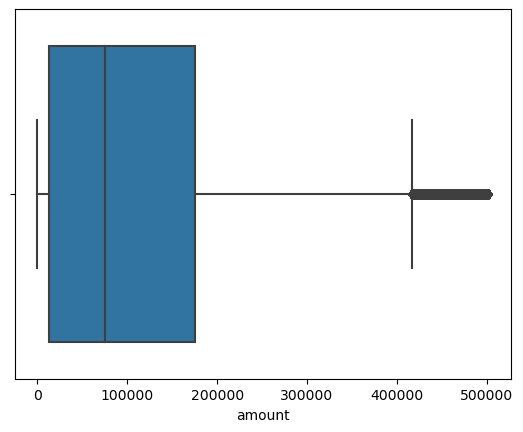

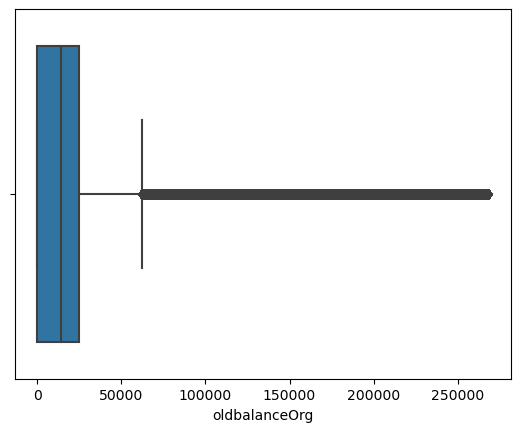

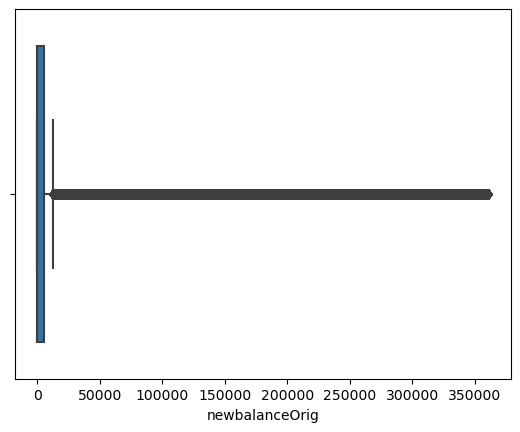

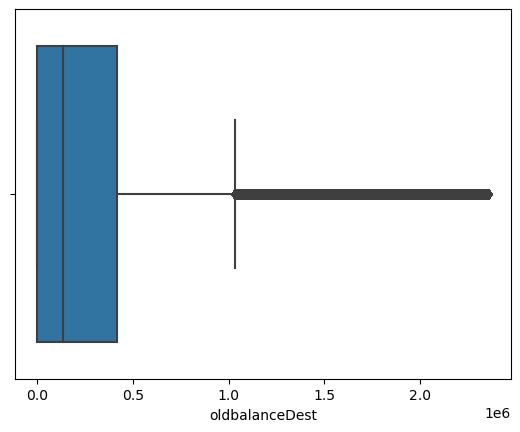

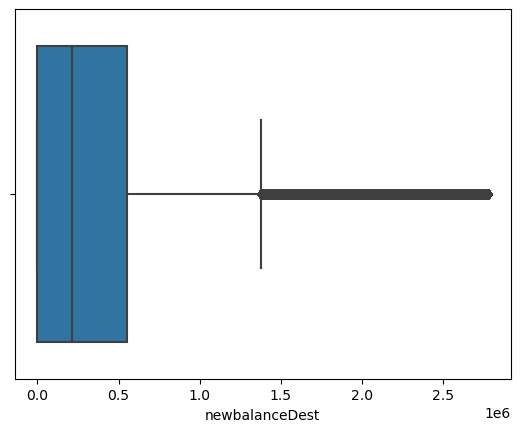

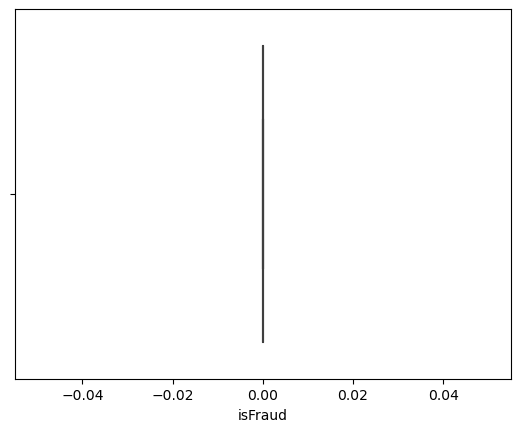

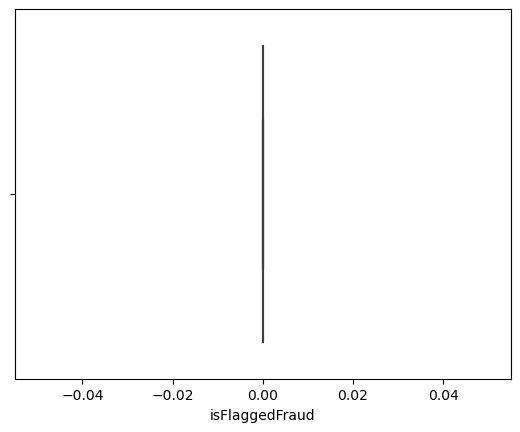

In [17]:
for i in Financial_transaction_data.describe():
    sns.boxplot(data=Financial_transaction_data,x=i)
    plt.show()

In [18]:
Financial_transaction_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


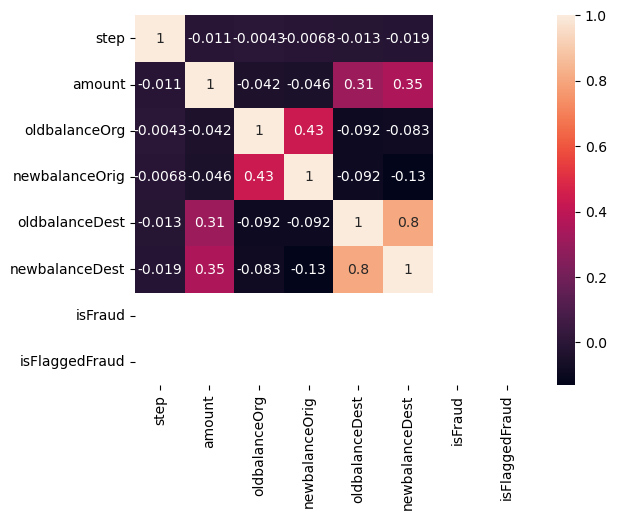

In [19]:
sns.heatmap(Financial_transaction_data.select_dtypes(include=['int', 'float']).corr(),annot=True)
plt.show()


In [20]:
def nameorig(x):
    return x

In [21]:
Financial_transaction_data["nameOrig1"]=Financial_transaction_data["nameOrig"].apply(nameorig)

In [22]:
Financial_transaction_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig1
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.000,0.00,0,0,C1231006815
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.000,0.00,0,0,C1666544295
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.000,0.00,0,0,C1305486145
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.000,0.00,0,0,C840083671
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.000,0.00,0,0,C2048537720
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,239,CASH_OUT,339682.13,C786484425,14208.0,0.00,C776919290,0.000,339682.13,0,0,C786484425
6362616,239,TRANSFER,74871.94,C1529008245,14208.0,0.00,C1881841831,0.000,0.00,0,0,C1529008245
6362617,239,CASH_OUT,74871.94,C1162922333,14208.0,0.00,C1365125890,68488.840,214661.44,0,0,C1162922333
6362618,239,TRANSFER,74871.94,C1685995037,14208.0,0.00,C2080388513,0.000,0.00,0,0,C1685995037


In [23]:
def nameorig(x):
    return x[0]

In [24]:
Financial_transaction_data["nameOrig1"]=Financial_transaction_data["nameOrig"].apply(nameorig)

In [25]:
Financial_transaction_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig1
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.000,0.00,0,0,C
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.000,0.00,0,0,C
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.000,0.00,0,0,C
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.000,0.00,0,0,C
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.000,0.00,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,239,CASH_OUT,339682.13,C786484425,14208.0,0.00,C776919290,0.000,339682.13,0,0,C
6362616,239,TRANSFER,74871.94,C1529008245,14208.0,0.00,C1881841831,0.000,0.00,0,0,C
6362617,239,CASH_OUT,74871.94,C1162922333,14208.0,0.00,C1365125890,68488.840,214661.44,0,0,C
6362618,239,TRANSFER,74871.94,C1685995037,14208.0,0.00,C2080388513,0.000,0.00,0,0,C


In [26]:
def nameorig(x):
    return x[1:]

In [27]:
Financial_transaction_data["nameOrig"]=Financial_transaction_data["nameOrig"].apply(nameorig)

In [28]:
Financial_transaction_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig1
0,1,PAYMENT,9839.64,1231006815,170136.0,160296.36,M1979787155,0.000,0.00,0,0,C
1,1,PAYMENT,1864.28,1666544295,21249.0,19384.72,M2044282225,0.000,0.00,0,0,C
2,1,TRANSFER,181.00,1305486145,181.0,0.00,C553264065,0.000,0.00,0,0,C
3,1,CASH_OUT,181.00,840083671,181.0,0.00,C38997010,21182.000,0.00,0,0,C
4,1,PAYMENT,11668.14,2048537720,41554.0,29885.86,M1230701703,0.000,0.00,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,239,CASH_OUT,339682.13,786484425,14208.0,0.00,C776919290,0.000,339682.13,0,0,C
6362616,239,TRANSFER,74871.94,1529008245,14208.0,0.00,C1881841831,0.000,0.00,0,0,C
6362617,239,CASH_OUT,74871.94,1162922333,14208.0,0.00,C1365125890,68488.840,214661.44,0,0,C
6362618,239,TRANSFER,74871.94,1685995037,14208.0,0.00,C2080388513,0.000,0.00,0,0,C


In [29]:
def nameorig(x):
    return x

In [30]:
Financial_transaction_data["nameDest1"]=Financial_transaction_data["nameDest"].apply(nameorig)

In [31]:
def nameorig(x):
    return x[0]

In [32]:
Financial_transaction_data["nameDest1"]=Financial_transaction_data["nameDest"].apply(nameorig)

In [33]:
def nameorig(x):
    return x[1:]

In [34]:
Financial_transaction_data["nameDest"]=Financial_transaction_data["nameDest"].apply(nameorig)

In [35]:
Financial_transaction_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig1,nameDest1
0,1,PAYMENT,9839.64,1231006815,170136.0,160296.36,1979787155,0.000,0.00,0,0,C,M
1,1,PAYMENT,1864.28,1666544295,21249.0,19384.72,2044282225,0.000,0.00,0,0,C,M
2,1,TRANSFER,181.00,1305486145,181.0,0.00,553264065,0.000,0.00,0,0,C,C
3,1,CASH_OUT,181.00,840083671,181.0,0.00,38997010,21182.000,0.00,0,0,C,C
4,1,PAYMENT,11668.14,2048537720,41554.0,29885.86,1230701703,0.000,0.00,0,0,C,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,239,CASH_OUT,339682.13,786484425,14208.0,0.00,776919290,0.000,339682.13,0,0,C,C
6362616,239,TRANSFER,74871.94,1529008245,14208.0,0.00,1881841831,0.000,0.00,0,0,C,C
6362617,239,CASH_OUT,74871.94,1162922333,14208.0,0.00,1365125890,68488.840,214661.44,0,0,C,C
6362618,239,TRANSFER,74871.94,1685995037,14208.0,0.00,2080388513,0.000,0.00,0,0,C,C


In [36]:
Financial_transaction_data["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

### Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
LE=LabelEncoder()
LE

LabelEncoder()

In [39]:
def HCD(col):
 Financial_transaction_data[col]=LE.fit_transform(Financial_transaction_data[col])


In [40]:
for i in Financial_transaction_data.select_dtypes(include=['object']):
 HCD(i)


In [41]:
Financial_transaction_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,nameOrig1,nameDest1
0,1,3,9839.64,757869,170136.0,160296.36,1379837,0.0,0.0,0,0,0,1
1,1,3,1864.28,2188998,21249.0,19384.72,1470815,0.0,0.0,0,0,0,1
2,1,4,181.00,1002156,181.0,0.00,2092350,0.0,0.0,0,0,0,0
3,1,1,181.00,5828262,181.0,0.00,1862780,21182.0,0.0,0,0,0,0
4,1,3,11668.14,3445981,41554.0,29885.86,325178,0.0,0.0,0,0,0,1


In [42]:
Financial_transaction_data["type"].value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

In [43]:
Financial_transaction_data['balance_difference'] = Financial_transaction_data['oldbalanceOrg'] - Financial_transaction_data['newbalanceOrig']

In [44]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = Financial_transaction_data.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = Financial_transaction_data['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(5090096, 12) (1272524, 12) (5090096,) (1272524,)


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Check if predict_proba returns probabilities for both classes
if len(np.unique(y_train)) > 1:
    y_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
else:
    y_prob = model.predict_proba(X_test)
    roc_auc = 'ROC AUC is not applicable for single class'

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:\n", roc_auc)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272524

    accuracy                           1.00   1272524
   macro avg       1.00      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:
 [[1272524]]
ROC AUC Score:
 ROC AUC is not applicable for single class
